In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import acorr_ljungbox

In [2]:
df = pd.read_csv("stable_sections.csv")

In [3]:
for section in range(1, 29): 
    globals()[f'df{section}'] = df[df['Stable_Section'] == section]
    print(f"Created df{section} for Stable_Section {section}")

Created df1 for Stable_Section 1
Created df2 for Stable_Section 2
Created df3 for Stable_Section 3
Created df4 for Stable_Section 4
Created df5 for Stable_Section 5
Created df6 for Stable_Section 6
Created df7 for Stable_Section 7
Created df8 for Stable_Section 8
Created df9 for Stable_Section 9
Created df10 for Stable_Section 10
Created df11 for Stable_Section 11
Created df12 for Stable_Section 12
Created df13 for Stable_Section 13
Created df14 for Stable_Section 14
Created df15 for Stable_Section 15
Created df16 for Stable_Section 16
Created df17 for Stable_Section 17
Created df18 for Stable_Section 18
Created df19 for Stable_Section 19
Created df20 for Stable_Section 20
Created df21 for Stable_Section 21
Created df22 for Stable_Section 22
Created df23 for Stable_Section 23
Created df24 for Stable_Section 24
Created df25 for Stable_Section 25
Created df26 for Stable_Section 26
Created df27 for Stable_Section 27
Created df28 for Stable_Section 28


In [10]:


for i in range(1, 29):
    df = globals().get(f"df{i}")  # Get dataframe

    if df is None or "closePrice" not in df.columns:
        print(f"Skipping df{i} (missing or no 'closePrice' column).")
        continue

    df = df.dropna(subset=["closePrice"])  # Remove missing values

    # Get the number of data points
    n_obs = len(df["closePrice"])

    if n_obs <= 5:
        print(f"Skipping df{i} (only {n_obs} data points).")
        continue

    max_lags = min(n_obs - 1, 10)

    ljung_box_results = acorr_ljungbox(df["closePrice"], lags=max_lags)

    print(f"Ljung-Box Test Results for df{i}:")
    print(ljung_box_results)

Ljung-Box Test Results for df1:
     lb_stat  lb_pvalue
1   0.600065   0.438553
2   0.665138   0.717079
3   0.712933   0.870158
4   0.887092   0.926405
5   1.295276   0.935417
6   1.404545   0.965581
7   2.626114   0.917305
8   3.527960   0.897009
9   3.550735   0.938423
10  4.212353   0.937259
Ljung-Box Test Results for df2:
     lb_stat  lb_pvalue
1   0.086103   0.769191
2   0.091288   0.955382
3   0.094012   0.992546
4   1.298402   0.861647
5   1.298443   0.935092
6   1.578934   0.954080
7   3.097550   0.875834
8   3.837563   0.871474
9   4.296058   0.890869
10  4.834026   0.901986
Ljung-Box Test Results for df3:
      lb_stat  lb_pvalue
1    2.446488   0.117788
2    2.891707   0.235545
3    3.050886   0.383846
4    3.164197   0.530733
5    3.410476   0.636975
6    3.436508   0.752397
7    5.973500   0.542847
8   12.392135   0.134547
9   12.474129   0.187880
10  12.703750   0.240710
Ljung-Box Test Results for df4:
      lb_stat  lb_pvalue
1    7.534556   0.006053
2    8.345335   0.0

In [13]:
from sklearn.feature_selection import mutual_info_regression
import numpy as np

def compute_mutual_information(series, max_lag=10):
    """Compute mutual information between the time series and its lagged versions."""
    series = series.dropna().values  # Convert to NumPy array (1D)
    mi_scores = []
    
    for lag in range(1, max_lag + 1):
        lagged_series = np.roll(series, shift=lag)  # Shift the series
        mi = mutual_info_regression(lagged_series.reshape(-1, 1), series)[0]
        mi_scores.append(mi)
    
    return mi_scores  # Return the list of MI scores

# Iterate through the datasets
for i in range(1, 29):
    df = globals().get(f"df{i}")  # Fetch the dataframe dynamically
    
    if df is None or "closePrice" not in df.columns:
        print(f"Skipping df{i} (missing or no 'closePrice' column).")
        continue  # Skip missing datasets
    
    mi_results = compute_mutual_information(df["closePrice"], max_lag=10)
    
    print(f"Mutual Information Scores for df{i}:", mi_results)

Mutual Information Scores for df1: [np.int64(0), np.float64(0.2503587047627296), np.int64(0), np.int64(0), np.float64(0.1627914109454358), np.float64(0.0016045422585673208), np.float64(0.07517472207874687), np.float64(0.10430170620573143), np.int64(0), np.int64(0)]
Mutual Information Scores for df2: [np.int64(0), np.float64(0.19368662684065185), np.float64(0.048015076169101834), np.int64(0), np.float64(0.2193871762912012), np.int64(0), np.float64(0.05283525598928085), np.int64(0), np.int64(0), np.int64(0)]
Mutual Information Scores for df3: [np.float64(0.004683546587571641), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.float64(0.21138628829031303), np.float64(0.01474126664529174), np.float64(0.1314644046184299), np.float64(0.005716541370566208), np.int64(0)]
Mutual Information Scores for df4: [np.float64(0.09808701811604292), np.float64(0.05586879924341237), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.float64(0.13675478825440135), np.int64(0), np.float

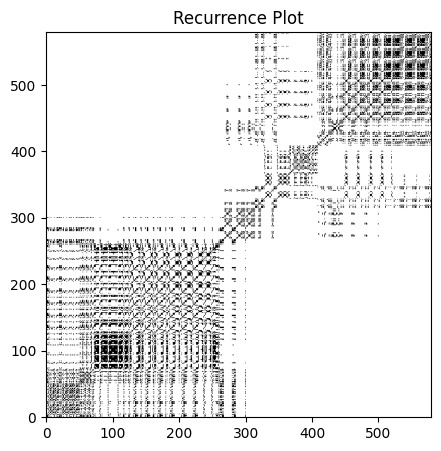

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyts.image import RecurrencePlot

df = pd.read_csv("stable_sections.csv")

def plot_recurrence(series):
    series = series.dropna().values.reshape(1, -1)  # Convert to numpy array
    rp = RecurrencePlot(threshold='point', percentage=10)  # Use 10% recurrence threshold
    recurrence_matrix = rp.fit_transform(series)

    plt.figure(figsize=(5, 5))
    plt.imshow(recurrence_matrix[0], cmap='binary', origin='lower')
    plt.title("Recurrence Plot")
    plt.show()

# Example usage:
# Ensure 'closePrice' is present in your DataFrame before calling
plot_recurrence(df["closePrice"])

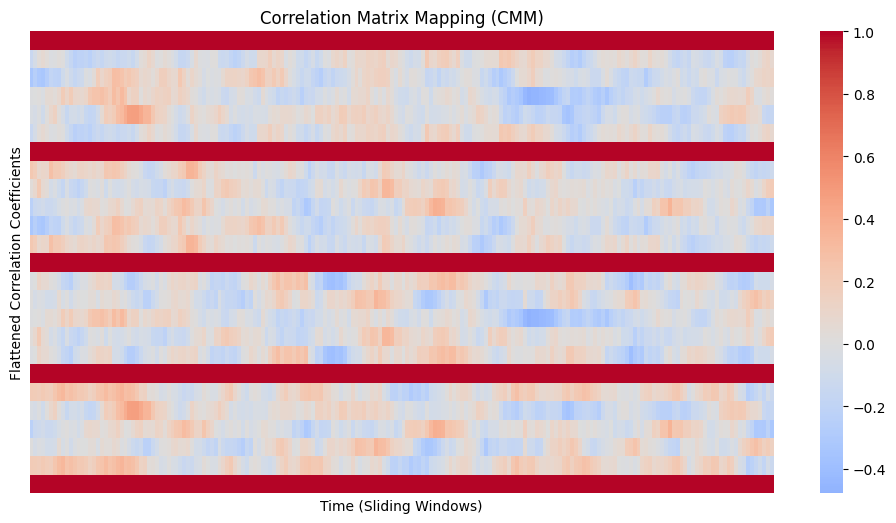

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic multivariate time series (1000 time points, 5 variables)
np.random.seed(42)
time_series = np.random.rand(1000, 5)  # Replace with your actual time series data

# Set CMM parameters
window_size = 50  # Number of time points in each sliding window
step_size = 5     # Step size for moving window

def compute_correlation_matrix(series, window_size, step_size):
    """Computes a sequence of correlation matrices for a sliding window"""
    num_points = len(series)
    matrices = []
    
    for start in range(0, num_points - window_size, step_size):
        window = series[start:start + window_size]
        corr_matrix = np.corrcoef(window, rowvar=False)  # Compute correlation matrix
        matrices.append(corr_matrix)

    return np.array(matrices)

# Compute CMM
cmm_matrices = compute_correlation_matrix(time_series, window_size, step_size)

# Flatten the correlation matrices to visualize as a heatmap
cmm_flat = np.array([mat.flatten() for mat in cmm_matrices])

# Plot CMM as a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(cmm_flat.T, cmap="coolwarm", center=0, xticklabels=False, yticklabels=False)
plt.xlabel("Time (Sliding Windows)")
plt.ylabel("Flattened Correlation Coefficients")
plt.title("Correlation Matrix Mapping (CMM)")
plt.show()